### 直方图均衡化
展平后画直方图，归一化cdf，把原图灰度映射到新的灰度值，使得灰度分布更均匀。

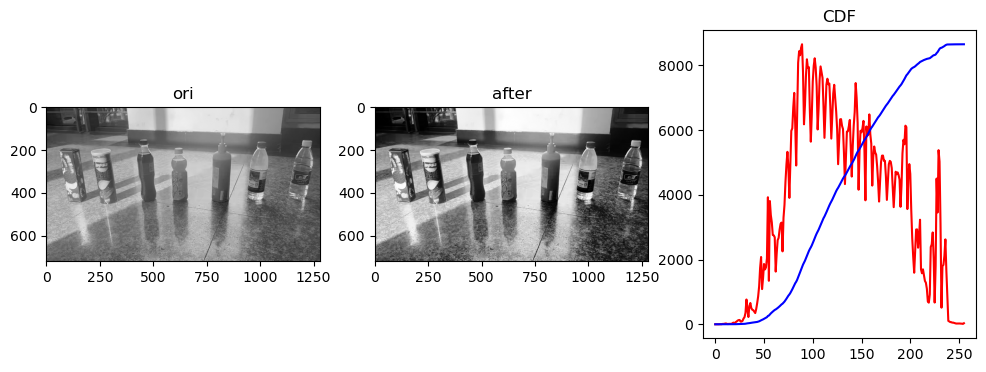

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("raw.jpg", cv2.IMREAD_GRAYSCALE)

hist, bins = np.histogram(img.flatten(), 256, [0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
equalized = cdf[img]

plt.figure(figsize=(12,4))
plt.subplot(1,3,1), plt.imshow(img, cmap='gray'), plt.title("ori")
plt.subplot(1,3,2), plt.imshow(equalized, cmap='gray'), plt.title("after")
plt.subplot(1,3,3), plt.plot(hist, color='r'), plt.plot(cdf_normalized, color='b'), plt.title("CDF")
plt.show()